---
### Veri Seti Hakkında
#### Kan Transfüzyon Servis Merkezi Veri Seti

🩸 **Veri Seti Bilgileri:**
Bu veri seti, Tayvan'ın Hsin-Chu Şehri'ndeki Kan Transfüzyon Servis Merkezi'nden alınmıştır. Bu, bir sınıflandırma problemidir.

**Veri Seti Açıklaması:**
RFMTC pazarlama modelini (RFM'nin değiştirilmiş bir versiyonu) göstermek için, bu çalışma Hsin-Chu Şehri'ndeki Kan Transfüzyon Servis Merkezi'nin bağışçı veritabanını kullanmıştır. Merkez, kan bağışı toplamak amacıyla her üç ayda bir Hsin-Chu Şehri'ndeki bir üniversiteye kan bağışı otobüsünü gönderir. Bir FRMTC modeli oluşturmak için bağışçı veritabanından rastgele 748 bağışçı seçilmiştir. Bu 748 bağışçı verisinin her biri R (Recency - son bağıştan bu yana geçen ay sayısı), F (Frequency - toplam bağış sayısı), M (Monetary - toplam bağışlanan kan miktarı (c.c.)), T (Time - ilk bağıştan bu yana geçen ay sayısı) ve Mart 2007'de kan bağışlayıp bağışlamadığını belirten ikili bir değişken (1, kan bağışlayanlar için; 0, kan bağışlamayanlar için) içermektedir.

🧬 **Değişkenler:**
- **R (Recency)**: Son bağıştan bu yana geçen ay sayısı
- **F (Frequency)**: Toplam bağış sayısı
- **M (Monetary)**: Toplam bağışlanan kan miktarı (c.c.)
- **T (Time)**: İlk bağıştan bu yana geçen ay sayısı
- **Bağış Durumu (Binary Variable)**: Mart 2007'de kan bağışlayıp bağışlamadığını belirten ikili değişken (1 = Bağışladı, 0 = Bağışlamadı)

💡 Bu veri seti, kan bağışında bulunan kişilerin belirli bir dönemde bağış yapıp yapmadıklarını tahmin etmek için kullanılabilir.

---

---
### 📊 Veri Seti
- https://www.kaggle.com/datasets/whenamancodes/blood-transfusion-dataset/data

---

---
### 📚 Gerekli Kütüphanelerin Yüklenmesi
---

In [23]:
# Veri Manipülasyonu
import numpy as np
import pandas as pd

# Görselleştirme Kütüphaneleri
import seaborn as sns
import matplotlib.pyplot as plt

# Önişleme ve Model Seçimi
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score, cross_validate, validation_curve
from sklearn.preprocessing import StandardScaler, RobustScaler, scale
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRFClassifier



# Modeller
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


# Model Değerlendirme Metrikleri
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Miscellaneous
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

---
### 📊 Veri Setinin İçe Aktarılması
---

In [9]:
data = pd.read_csv("./datasets/transfusion.csv")
data1 = pd.read_csv("./datasets/transfusion.csv")

---
### 🔍 Gelişmiş Fonksiyonel Keşifçi Veri Analizi (Advanced Functional EDA) 🚀
Veri setimizin derinlemesine analizine giriş yapıyoruz, önemli öngörüler elde etmeyi hedefliyoruz.
#### 🌍 1. Genel Resim
Veri setimizin genel yapısı ve temel istatistiklerine genel bir bakış.
#### 📊 2. Kategorik Değişken Analizi 
Kategorik değişkenlerin dağılımı ve hedef değişkenle ilişkileri üzerine odaklanma.
#### 🔢 3. Sayısal Değişken Analizi 
Sayısal değişkenlerin temel istatistikleri ve veri setindeki rollerinin incelenmesi.
#### 🎯 4. Hedef Değişken Analizi 
Hedef değişkenin incelemesi, dağılımı ve diğer değişkenlerle ilişkisi.
#### 🔗 5. Korelasyon Analizi 
Değişkenler arası ilişkilerin ve hedef değişken üzerindeki etkilerinin keşfi.

---

---
### 🌍1. Genel Resim
---

In [3]:
def check_df(dataframe, head=5):
    print("\n" + "#" * 50 + " Shape " + "#" * 50)
    print(f"📏 Rows: {dataframe.shape[0]}, Columns: {dataframe.shape[1]}")

    print("\n" + "#" * 50 + " Types " + "#" * 50)
    print("🔤" + "\n" + str(dataframe.dtypes))

    print("\n" + "#" * 50 + " Head " + "#" * 50)
    print("🔝" + "\n" + str(dataframe.head(head)))

    print("\n" + "#" * 50 + " Tail " + "#" * 50)
    print("🔚" + "\n" + str(dataframe.tail(head)))

    print("\n" + "#" * 50 + " Missing Values " + "#" * 50)
    missing_values = dataframe.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    if len(missing_values) > 0:
        print("❗" + "\n" + str(missing_values))
    else:
        print("✅ No missing values.")

    print("\n" + "#" *50 + " Quantiles " + "#" * 50)
    print("📊" + "\n" + str(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T))
    
check_df(data)


################################################## Shape ##################################################
📏 Rows: 748, Columns: 5

################################################## Types ##################################################
🔤
Recency (months)                              int64
Frequency (times)                             int64
Monetary (c.c. blood)                         int64
Time (months)                                 int64
whether he/she donated blood in March 2007    int64
dtype: object

################################################## Head ##################################################
🔝
   Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)  whether he/she donated blood in March 2007
0                 2                 50                  12500             98                                           1
1                 0                 13                   3250             28                                           1
2        

In [4]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """


    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]


    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(data)

Observations: 748
Variables: 5
cat_cols: 1
num_cols: 4
cat_but_car: 0
num_but_cat: 1


---
### 📊 2. Kategorik Değişken Analizi
---

   whether he/she donated blood in March 2007  Ratio
0                                         570 76.203
1                                         178 23.797
----------------------------------------------------------------------------------------------------


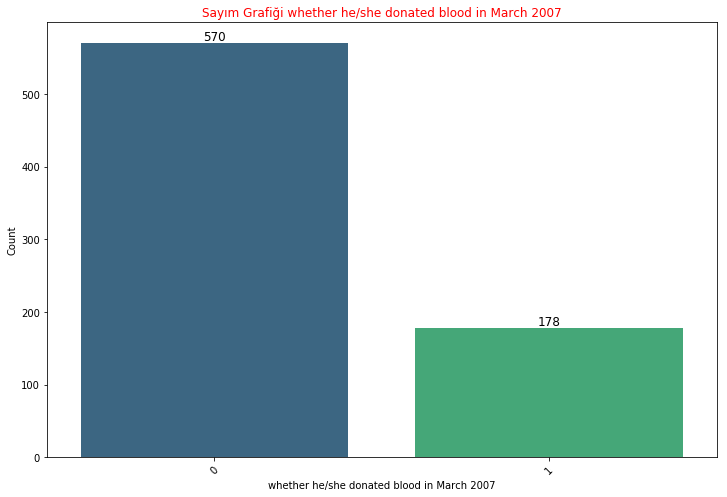

In [5]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    
    print("-" * 100)

    if plot:
        plt.figure(figsize=(12, 8))
        ax = sns.countplot(x=dataframe[col_name], data=dataframe, palette="viridis")
        plt.title(f'Sayım Grafiği {col_name}', color='red')  
        plt.xlabel(f'{col_name}')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        for p in ax.patches: 
            ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
                    fontsize=12, ha='center', va='bottom')
        

for col in cat_cols:
    cat_summary(data, col, plot=True)

---
### 🔢 3. Sayısal Değişken Analizi
---

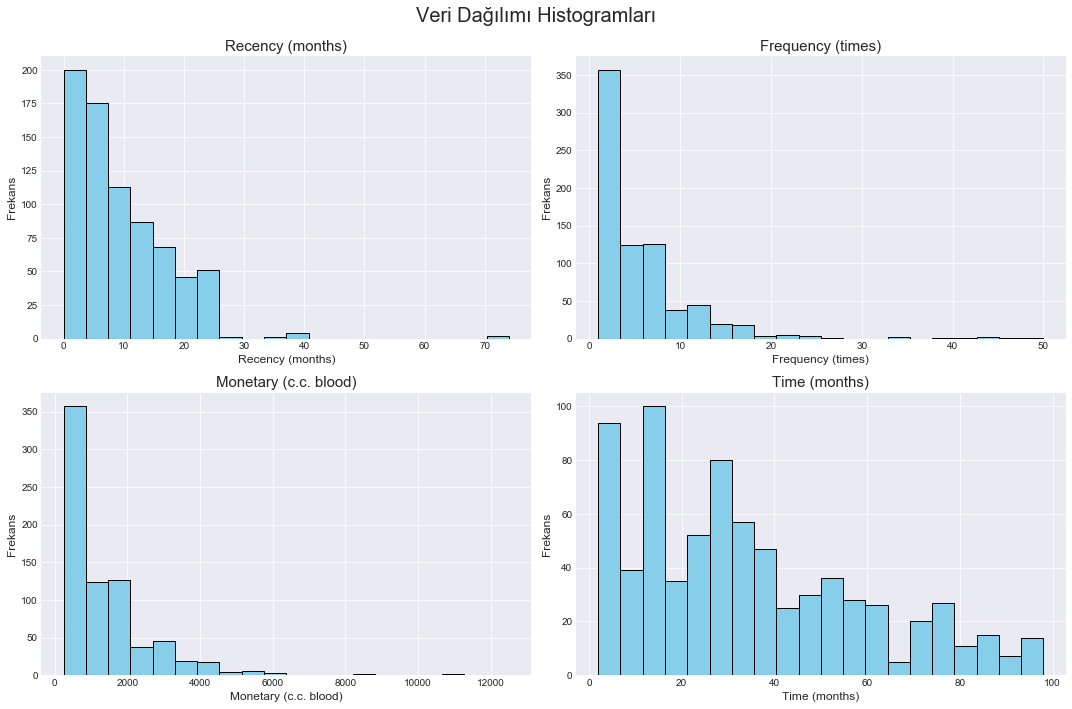

In [6]:
# Grafik stili
plt.style.use('seaborn-darkgrid')

# Histogramlar
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Veri Dağılımı Histogramları', fontsize=20)

columns = data.columns
for i, ax in enumerate(axes.flatten()):
    if i < len(columns):
        ax.hist(data[columns[i]], bins=20, color='skyblue', edgecolor='black')
        ax.set_title(columns[i], fontsize=15)
        ax.set_xlabel(columns[i], fontsize=12)
        ax.set_ylabel('Frekans', fontsize=12)
    else:
        fig.delaxes(ax)  

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

---
### 🎯 4. Hedef Değişken Analizi
---

Recency (months) Kategorisine Göre whether he/she donated blood in March 2007 Ortalamaları:
Recency (months)  TARGET_MEAN
              0        0.400
              1        0.220
              2        0.380
              3        0.380
              4        0.370
              5        0.330
              6        0.400
              7        0.120
              8        0.170
              9        0.200
             10        0.000
             11        0.150
             12        0.000
             13        0.200
             14        0.120
             15        0.000
             16        0.060
             17        1.000
             18        0.000
             20        1.000
             21        0.070
             22        1.000
             23        0.020
             25        0.000
             26        1.000
             35        0.000
             38        0.000
             39        0.000
             40        0.000
             72        0.000
        

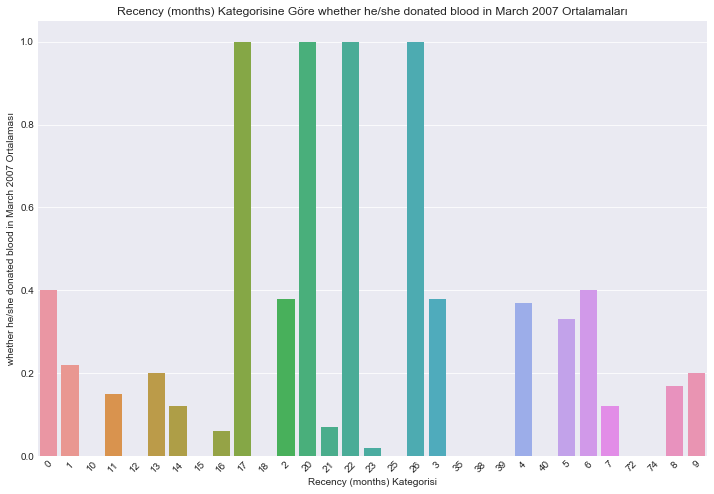

In [7]:
def target_summary_with_cat(dataframe, target, categorical_col):
    summary_df = pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}).reset_index()
    summary_df = summary_df.round(2)
    summary_df[categorical_col] = summary_df[categorical_col].astype(str)

    print(f"{categorical_col} Kategorisine Göre {target} Ortalamaları:")
    print(summary_df.to_string(index=False), end="\n\n\n")
    print("-" * 100)

    plt.figure(figsize=(12, 8))
    sns.barplot(x=categorical_col, y="TARGET_MEAN", data=summary_df)
    plt.xticks(rotation=45)
    plt.title(f"{categorical_col} Kategorisine Göre {target} Ortalamaları")
    plt.xlabel(f"{categorical_col} Kategorisi")
    plt.ylabel(f"{target} Ortalaması")
    plt.show()

# Define the target and categorical columns
target = "whether he/she donated blood in March 2007"
cat_cols = ["Recency (months)"]

# Apply the function to each categorical column
for col in cat_cols:
    target_summary_with_cat(data, target, col)

---
### 🔗 5. Korelasyon Analizi
---

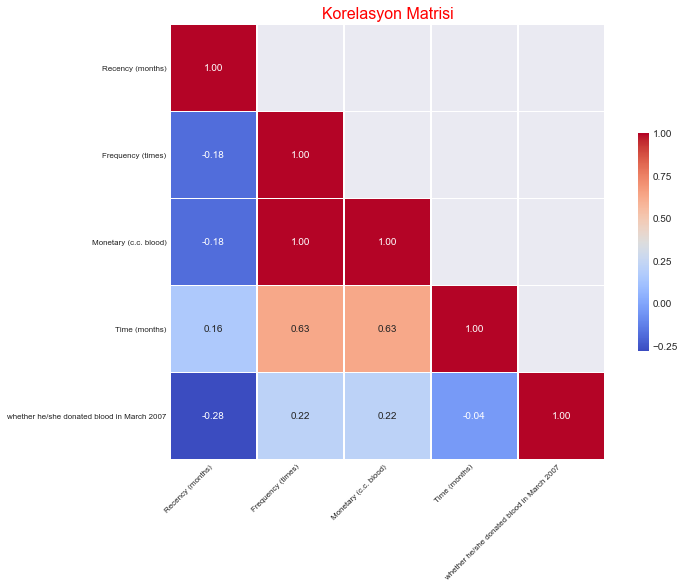

Yüksek korelasyona sahip sütun çiftleri (0.9 üzeri):
             Sütun 1                Sütun 2  Korelasyon Değeri
0  Frequency (times)  Monetary (c.c. blood)              1.000


In [8]:
def high_correlated_cols_df(dataframe, corr_th=0.90, figsize=(12, 8)):
    """
    Veri çerçevesinin korelasyon matrisini çizer ve korelasyon değerlerini ısı haritası üzerinde sayısal olarak gösterir.
    Aynı zamanda, belirlenen korelasyon eşiğini aşan sütun çiftlerini ve bu çiftlerin korelasyon değerlerini içeren bir DataFrame döndürür.

    Parameters:
    dataframe (pd.DataFrame): Analiz edilecek veri çerçevesi.
    corr_th (float): Yüksek korelasyon eşiği (varsayılan 0.90).
    figsize (tuple): Figür boyutu (varsayılan (10, 8)).

    Returns:
    pd.DataFrame: Eşiği aşan korelasyonlara sahip sütun çiftleri ve korelasyon değerleri.
    """
    corr = dataframe.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
    upper_triangle_matrix = corr.where(mask)

    # Korelasyon eşiğini aşan değerleri içeren çiftleri bul
    high_corr_pairs = [(i, j, upper_triangle_matrix.loc[i,j]) for i in upper_triangle_matrix.columns for j in upper_triangle_matrix.columns if upper_triangle_matrix.loc[i,j] > corr_th]

    # Çizim yap
    plt.figure(figsize=figsize)
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm",
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.ylim(len(corr), 0)
    plt.title("Korelasyon Matrisi", fontsize=16, color = 'red')
    plt.xticks(fontsize=8, rotation=45, ha="right")
    plt.yticks(fontsize=8)
    plt.show()

    if len(high_corr_pairs) == 0:
        print("Yüksek korelasyona sahip sütun çifti bulunamadı.")
        return pd.DataFrame()
    else:
        high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Sütun 1', 'Sütun 2', 'Korelasyon Değeri'])
        print(f"Yüksek korelasyona sahip sütun çiftleri ({corr_th} üzeri):\n{high_corr_df}")
        return high_corr_df
    
drop_list = high_correlated_cols_df(dataframe=data)

---
### Görselleştirme ile EDA
---

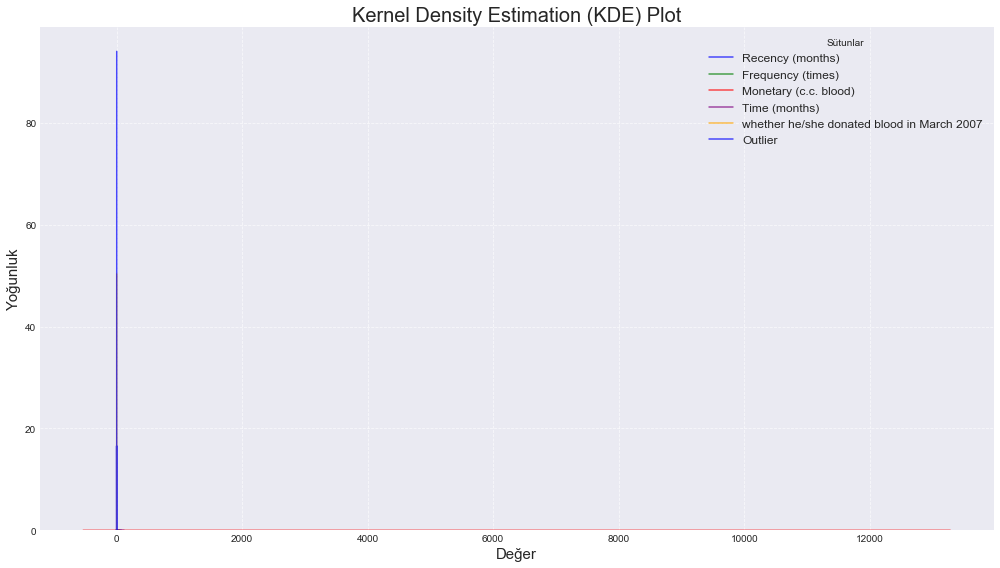

In [21]:
plt.style.use('seaborn-darkgrid')

# KDE Plot
plt.figure(figsize=(14, 8))
colors = ['blue', 'green', 'red', 'purple', 'orange'] 

for i, column in enumerate(data.columns):
    sns.kdeplot(data[column], shade=True, label=column, color=colors[i % len(colors)], alpha=0.7)

plt.title('Kernel Density Estimation (KDE) Plot', fontsize=20)
plt.xlabel('Değer', fontsize=15)
plt.ylabel('Yoğunluk', fontsize=15)
plt.legend(title='Sütunlar', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

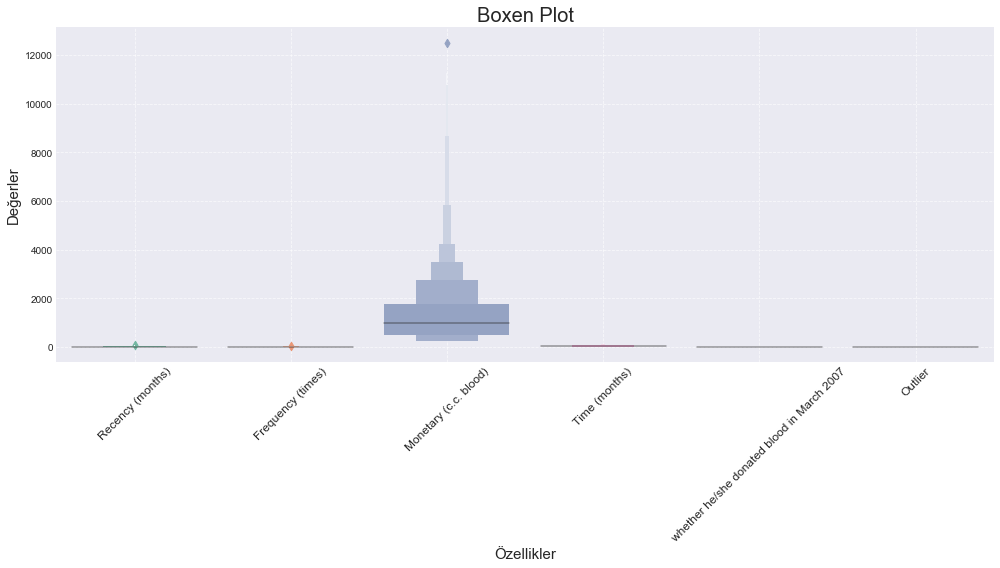

In [22]:
plt.style.use('seaborn-darkgrid')

# Boxen Plot
plt.figure(figsize=(14, 8))
sns.boxenplot(data=data, palette='Set2')  
plt.title('Boxen Plot', fontsize=20)
plt.xlabel('Özellikler', fontsize=15)
plt.ylabel('Değerler', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

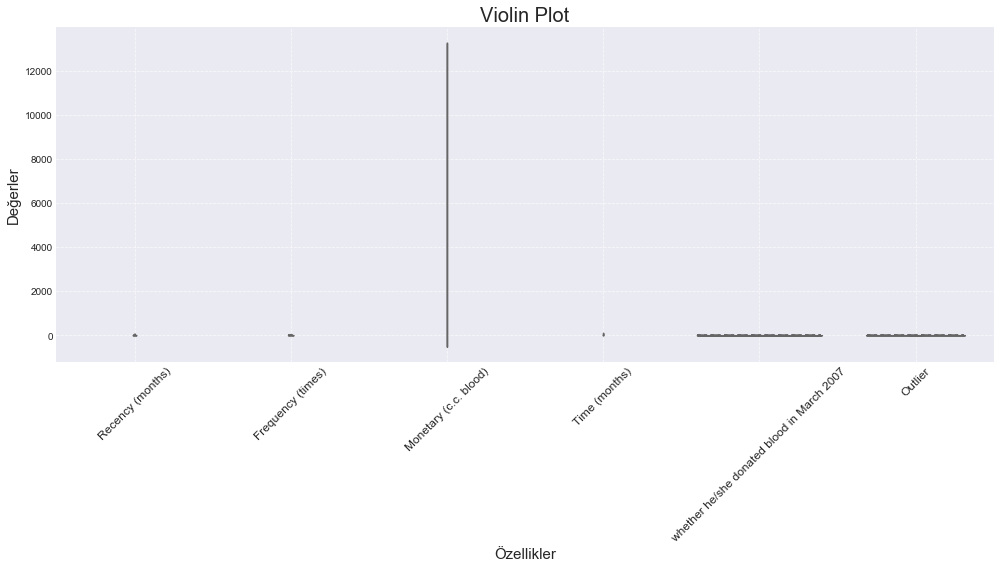

In [23]:
# Grafik stilini seçelim
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(14, 8))
sns.violinplot(data=data, palette='Set3', inner='quartile')  
plt.title('Violin Plot', fontsize=20)
plt.xlabel('Özellikler', fontsize=15)
plt.ylabel('Değerler', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

---
### 🚫 Aykırı Değer Analizi
---

In [9]:
num_cols1 = data.select_dtypes(include=['float64', 'int64']).columns

# Aykırı gözlemleri IQR yöntemiyle belirleme
Q1 = data[num_cols1].quantile(0.25)
Q3 = data[num_cols1].quantile(0.75)
IQR = Q3 - Q1

outliers_numeric = ((data[num_cols] < (Q1 - 1.5 * IQR)) | (data[num_cols] > (Q3 + 1.5 * IQR)))
outlier_summary_numeric = outliers_numeric.sum().sort_values(ascending=False)
filtered_outliers_summary = outlier_summary_numeric[outlier_summary_numeric > 0]
outlier_summary_str = "\n".join([f"{index}: {value} Aykırı Değer" for index, value in filtered_outliers_summary.items()])

print("Aykırı Değer Analizi Sonuçları:\n")
print(outlier_summary_str)

Aykırı Değer Analizi Sonuçları:

Monetary (c.c. blood): 45 Aykırı Değer
Frequency (times): 45 Aykırı Değer
Recency (months): 7 Aykırı Değer


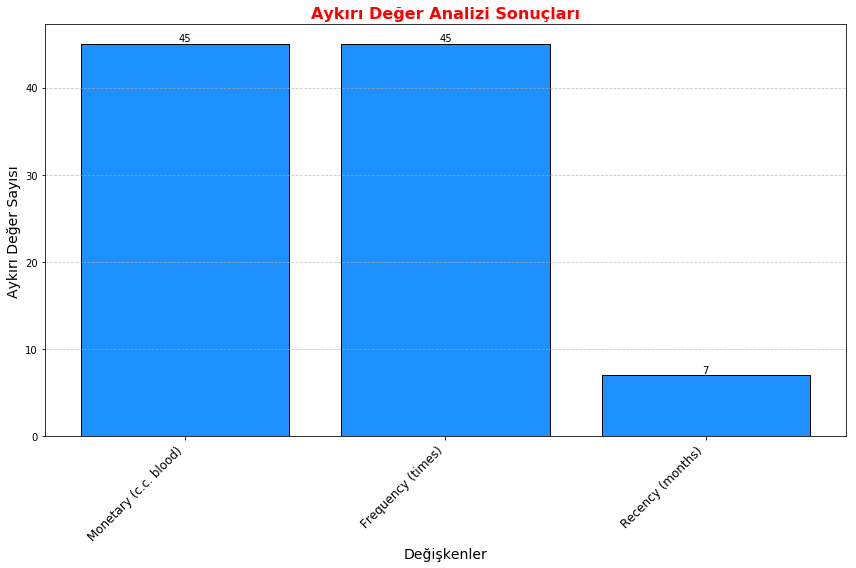

In [10]:
# Aykırı Değer Analizi Sonuçlarını Çubuk Grafiği ile Görselleştirme
plt.figure(figsize=(12, 8))
bars = plt.bar(filtered_outliers_summary.index, filtered_outliers_summary.values, color='dodgerblue', edgecolor='black')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + .05, yval, ha='center', va='bottom')

plt.xlabel('Değişkenler', fontsize=14)
plt.ylabel('Aykırı Değer Sayısı', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.title('Aykırı Değer Analizi Sonuçları', fontsize=16, fontweight='bold', color='red')
plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

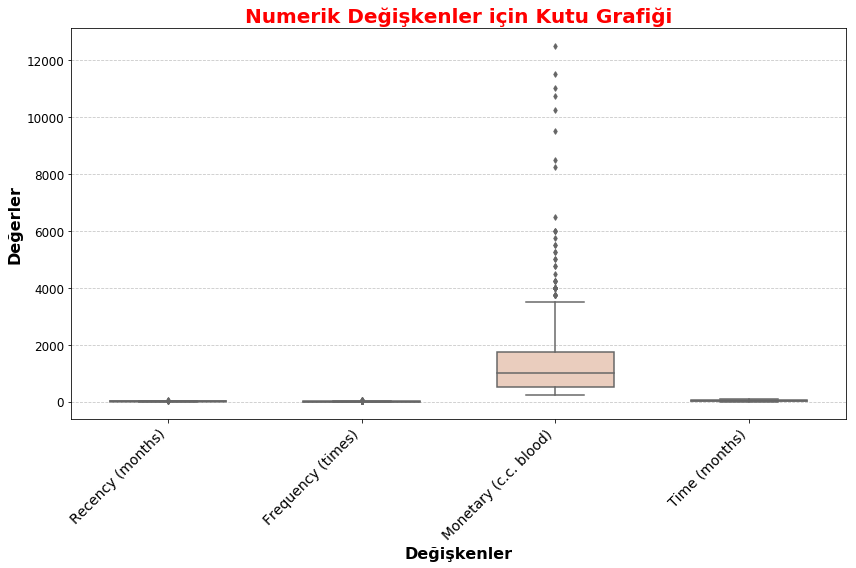

In [11]:
# Kutu Grafiği ile Aykırı Gözlem Analizi
num_cols_df = data[num_cols]
plt.figure(figsize=(12, 8))
sns.boxplot(data=num_cols_df, palette="coolwarm", width=0.6, fliersize=4, linewidth=1.5)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('Değişkenler', fontsize=16, fontweight='bold')
plt.ylabel('Değerler', fontsize=16, fontweight='bold')
plt.title('Numerik Değişkenler için Kutu Grafiği', fontsize=20, fontweight='bold', color='red')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

---
### 🔍Çok Değişkenli Aykırı Gözlem Analizi
---

In [13]:
def detect_outliers(data, num_cols):
    """
    Veri setindeki sayısal sütunlar için aykırı değerleri tespit eder.
    Aykırı değerleri ve normal değerleri sayar, aykırı değer içeren gözlemleri döndürür.

    Parametreler:
    - data (pd.DataFrame): İşlenecek veri seti.
    - num_cols (list): Aykırı değer tespiti yapılacak sayısal sütunların isimleri.

    Döndürülen Değerler:
    - outlier_count (int): Aykırı değer sayısı.
    - normal_count (int): Normal değer sayısı.
    - outliers_df (pd.DataFrame): Aykırı değer içeren gözlemler.
    """
    # Aykırı değer tespiti
    numeric_data = data[num_cols]
    lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')
    data['Outlier'] = lof.fit_predict(numeric_data)

    # Aykırı ve normal değer sayıları
    outlier_count = (data['Outlier'] == -1).sum()
    normal_count = (data['Outlier'] == 1).sum()

    # Aykırı değer içeren gözlemler
    outliers_df = data[data['Outlier'] == -1]

    return outlier_count, normal_count, outliers_df


outlier_count, normal_count, outliers_df = detect_outliers(data, num_cols)

print(f"Toplam {outlier_count} aykırı değer bulundu. ")
print(f"Veri setindeki toplam oyuncu sayısına oranı: {outlier_count / (outlier_count + normal_count):.2%}")
print("-" * 100)
print("\nAykırı Değer Olarak Belirlenen Gözlemler:")
print(outliers_df.T)


Toplam 83 aykırı değer bulundu. 
Veri setindeki toplam oyuncu sayısına oranı: 11.10%
----------------------------------------------------------------------------------------------------

Aykırı Değer Olarak Belirlenen Gözlemler:
                                              0     3     4     7      9     10    12    27    31    32    36    44    53    55    62    109   114   115   131   137  \
Recency (months)                                2     2     1     1      5     4     2     4     4     4     2     4     2     4     2     2     2    11     2     2   
Frequency (times)                              50    20    24    12     46    23    10    12    10    10    12    20    12    19    10    10    12    24    12    12   
Monetary (c.c. blood)                       12500  5000  6000  3000  11500  5750  2500  3000  2500  2500  3000  5000  3000  4750  2500  2500  3000  6000  3000  3000   
Time (months)                                  98    45    77    35     98    58    28    34    28 

---
###  📊 Veri Seti Ayrıştırması
---

In [19]:
y = data1["whether he/she donated blood in March 2007"]
x = data1.drop("whether he/she donated blood in March 2007", axis=1)

---
### Train ve Set Olarak Ayrıştırma
---

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 50, random_state = 1)

---
### 🧮 Lojistik Regresyon
---

Doğruluk Skoru: 0.78
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87        37
           1       1.00      0.15      0.27        13

   micro avg       0.78      0.78      0.78        50
   macro avg       0.89      0.58      0.57        50
weighted avg       0.83      0.78      0.71        50



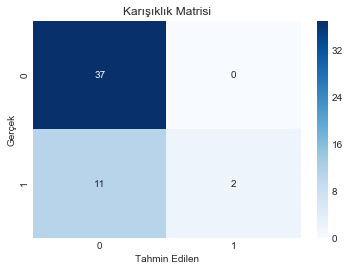

In [24]:
# Lojistik regresyon modelini kurma ve eğitme
log_model = LogisticRegression(solver="liblinear").fit(x_train, y_train)

# Test seti üzerinde tahmin yapma
preds = log_model.predict(x_test)

# Doğruluk skorunu hesaplama
accuracy = accuracy_score(y_test, preds)
print(f"Doğruluk Skoru: {accuracy:.2f}")

# Sınıflandırma raporu
class_report = classification_report(y_test, preds)
print("Sınıflandırma Raporu:\n", class_report)

# Karışıklık Matrisi
conf_matrix = confusion_matrix(y_test, preds)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Karışıklık Matrisi")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

In [27]:
# Çapraz doğrulama skorunu hesaplama
cross_val_scores = cross_val_score(log_model, x_test, y_test, cv=10)
mean_cross_val_score = cross_val_scores.mean()
print(f"Çapraz Doğrulama Ortalama Skoru: {mean_cross_val_score:.2f}")

Çapraz Doğrulama Ortalama Skoru: 0.79


---
### 📈 Navie Bayes
---

Naive Bayes Doğruluk Skoru: 0.78
Sınıflandırma Olasılıkları:
 [[-1.74978382e-01 -1.82930664e+00]
 [-5.38063708e-01 -8.76776111e-01]
 [-2.20925213e-01 -1.61836081e+00]
 [-4.03467275e-03 -5.51484674e+00]
 [-1.96577436e-01 -1.72337797e+00]
 [-1.00335666e-01 -2.34898246e+00]
 [-1.00335666e-01 -2.34898246e+00]
 [-2.27377021e-01 -1.59268101e+00]
 [-4.37418023e-03 -5.43422245e+00]
 [-2.27377021e-01 -1.59268101e+00]
 [-3.28184651e-01 -1.27378750e+00]
 [-2.55040611e-02 -3.68164251e+00]
 [-2.14668950e-01 -1.64407330e+00]
 [-1.92815715e-01 -1.74087965e+00]
 [-1.94883025e-01 -1.73121531e+00]
 [-2.68274884e-02 -3.63171199e+00]
 [-5.76070443e-02 -2.88277567e+00]
 [-9.84405691e-02 -2.36711882e+00]
 [-2.66217398e-01 -1.45359947e+00]
 [-2.14668950e-01 -1.64407330e+00]
 [-1.90225357e-01 -1.75315122e+00]
 [-2.30222193e-01 -1.58161402e+00]
 [-6.71480029e-02 -2.73424224e+00]
 [-1.71613700e-01 -1.84708927e+00]
 [-1.88155990e-01 -1.76308724e+00]
 [-1.24840425e+01 -3.78660540e-06]
 [-2.02358088e-01 -1.6971898

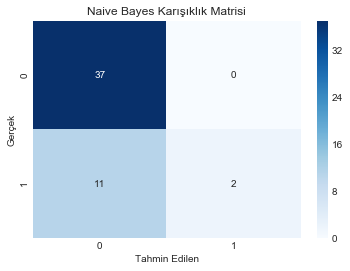

In [29]:
# Naive Bayes modelin
naive_model = GaussianNB().fit(x_train, y_train)

# Test seti üzerinde tahmin yapma
preds_NB = naive_model.predict(x_test)

# Doğruluk skorunu hesaplama
accuracy_NB = accuracy_score(y_test, preds_NB)
print(f"Naive Bayes Doğruluk Skoru: {accuracy_NB:.2f}")

# Sınıflandırma olasılıkları
olasiliklar = naive_model.predict_log_proba(x_test)
print("Sınıflandırma Olasılıkları:\n", olasiliklar)

# Çapraz doğrulama skorunu hesaplama
cross_val_scores_NB = cross_val_score(naive_model, x_test, y_test, cv=10)
mean_cross_val_score_NB = cross_val_scores_NB.mean()
print(f"Çapraz Doğrulama Ortalama Skoru (Naive Bayes): {mean_cross_val_score_NB:.2f}")

# Sınıflandırma raporu
class_report_NB = classification_report(y_test, preds_NB)
print("Naive Bayes Sınıflandırma Raporu:\n", class_report_NB)

# Karışıklık Matrisi
conf_matrix_NB = confusion_matrix(y_test, preds_NB)
sns.heatmap(conf_matrix_NB, annot=True, fmt='d', cmap='Blues')
plt.title("Naive Bayes Karışıklık Matrisi")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

---
### 🤝 KNN
---

KNN Doğruluk Skoru: 0.72
Çapraz Doğrulama Ortalama Skoru (KNN): 0.68
KNN Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.77      0.89      0.82        37
           1       0.43      0.23      0.30        13

   micro avg       0.72      0.72      0.72        50
   macro avg       0.60      0.56      0.56        50
weighted avg       0.68      0.72      0.69        50



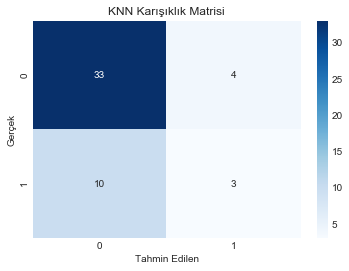

In [31]:

# KNN modelini kurma ve eğitme
knn_model = KNeighborsClassifier().fit(x_train, y_train)

# Test seti üzerinde tahmin yapma
preds_knn = knn_model.predict(x_test)

# Doğruluk skorunu hesaplama
accuracy_knn = accuracy_score(y_test, preds_knn)
print(f"KNN Doğruluk Skoru: {accuracy_knn:.2f}")

# Çapraz doğrulama skorunu hesaplama
cross_val_scores_knn = cross_val_score(knn_model, x_test, y_test, cv=10)
mean_cross_val_score_knn = cross_val_scores_knn.mean()
print(f"Çapraz Doğrulama Ortalama Skoru (KNN): {mean_cross_val_score_knn:.2f}")

# Sınıflandırma raporu
class_report_knn = classification_report(y_test, preds_knn)
print("KNN Sınıflandırma Raporu:\n", class_report_knn)

# Karışıklık Matrisi
conf_matrix_knn = confusion_matrix(y_test, preds_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title("KNN Karışıklık Matrisi")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

En İyi Hiperparametreler: {'n_neighbors': 8}
En İyi KNN Doğruluk Skoru: 0.68
Çapraz Doğrulama Ortalama Skoru (En İyi KNN): 0.74
En İyi KNN Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.73      0.89      0.80        37
           1       0.20      0.08      0.11        13

   micro avg       0.68      0.68      0.68        50
   macro avg       0.47      0.48      0.46        50
weighted avg       0.59      0.68      0.62        50



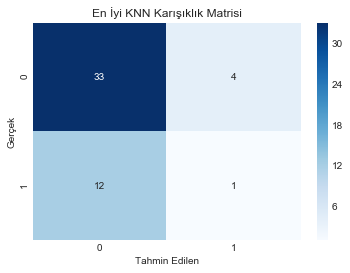

In [32]:
# Hiperparametre aralığını tanımlama
knn_params = {"n_neighbors": np.arange(1, 40)}

# GridSearchCV kullanarak en iyi hiperparametreleri belirleme
knn_model2 = KNeighborsClassifier()
knn_cv = GridSearchCV(knn_model2, knn_params, cv=10).fit(x_train, y_train)

# En iyi hiperparametreler
best_params = knn_cv.best_params_
print(f"En İyi Hiperparametreler: {best_params}")

# En iyi hiperparametrelerle KNN modelini kurma ve eğitme
knn_model_best = KNeighborsClassifier(n_neighbors=knn_cv.best_params_['n_neighbors']).fit(x_train, y_train)

# Test seti üzerinde tahmin yapma
preds_knn_best = knn_model_best.predict(x_test)

# Doğruluk skorunu hesaplama
accuracy_knn_best = accuracy_score(y_test, preds_knn_best)
print(f"En İyi KNN Doğruluk Skoru: {accuracy_knn_best:.2f}")

# Çapraz doğrulama skorunu hesaplama
cross_val_scores_knn_best = cross_val_score(knn_model_best, x_test, y_test, cv=10)
mean_cross_val_score_knn_best = cross_val_scores_knn_best.mean()
print(f"Çapraz Doğrulama Ortalama Skoru (En İyi KNN): {mean_cross_val_score_knn_best:.2f}")

# Sınıflandırma raporu
class_report_knn_best = classification_report(y_test, preds_knn_best)
print("En İyi KNN Sınıflandırma Raporu:\n", class_report_knn_best)

# Karışıklık Matrisi
conf_matrix_knn_best = confusion_matrix(y_test, preds_knn_best)
sns.heatmap(conf_matrix_knn_best, annot=True, fmt='d', cmap='Blues')
plt.title("En İyi KNN Karışıklık Matrisi")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

---
### 🎯 Support Vector Machine
---

SVC Doğruluk Skoru: 0.78
Çapraz Doğrulama Ortalama Skoru (SVC): 0.72
SVC Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.78      0.97      0.87        37
           1       0.75      0.23      0.35        13

   micro avg       0.78      0.78      0.78        50
   macro avg       0.77      0.60      0.61        50
weighted avg       0.77      0.78      0.73        50



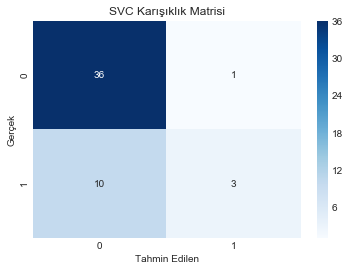

In [33]:
# SVC modelini kurma ve eğitme
svc_model = SVC(kernel="linear").fit(x_train, y_train)

# Test seti üzerinde tahmin yapma
preds_svc = svc_model.predict(x_test)

# Doğruluk skorunu hesaplama
accuracy_svc = accuracy_score(y_test, preds_svc)
print(f"SVC Doğruluk Skoru: {accuracy_svc:.2f}")

# Çapraz doğrulama skorunu hesaplama
cross_val_scores_svc = cross_val_score(svc_model, x_test, y_test, cv=10)
mean_cross_val_score_svc = cross_val_scores_svc.mean()
print(f"Çapraz Doğrulama Ortalama Skoru (SVC): {mean_cross_val_score_svc:.2f}")

# Sınıflandırma raporu
class_report_svc = classification_report(y_test, preds_svc)
print("SVC Sınıflandırma Raporu:\n", class_report_svc)

# Karışıklık Matrisi
conf_matrix_svc = confusion_matrix(y_test, preds_svc)
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues')
plt.title("SVC Karışıklık Matrisi")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

---
### 💻Yapay Sinir Ağları
---

MLP Doğruluk Skoru: 0.78
Çapraz Doğrulama Ortalama Skoru (MLP): 0.77
MLP Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86        37
           1       0.62      0.38      0.48        13

   micro avg       0.78      0.78      0.78        50
   macro avg       0.72      0.65      0.67        50
weighted avg       0.76      0.78      0.76        50



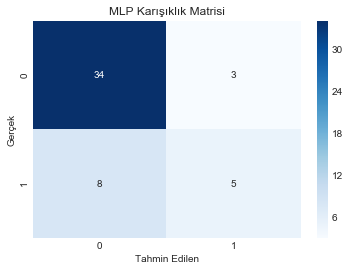

In [36]:
# Veriyi ölçekleme
scaler = StandardScaler()
scaler.fit(x_train)
X_train_z = scaler.transform(x_train)
X_test_z = scaler.transform(x_test)

# MLPClassifier modelini kurma ve eğitme
mlp_model = MLPClassifier(random_state=42).fit(X_train_z, y_train)

# Test seti üzerinde tahmin yapma
preds_mlp = mlp_model.predict(X_test_z)

# Doğruluk skorunu hesaplama
accuracy_mlp = accuracy_score(y_test, preds_mlp)
print(f"MLP Doğruluk Skoru: {accuracy_mlp:.2f}")

# Çapraz doğrulama skorunu hesaplama
cross_val_scores_mlp = cross_val_score(mlp_model, X_test_z, y_test, cv=10)
mean_cross_val_score_mlp = cross_val_scores_mlp.mean()
print(f"Çapraz Doğrulama Ortalama Skoru (MLP): {mean_cross_val_score_mlp:.2f}")

# Sınıflandırma raporu
class_report_mlp = classification_report(y_test, preds_mlp)
print("MLP Sınıflandırma Raporu:\n", class_report_mlp)

# Karışıklık Matrisi
conf_matrix_mlp = confusion_matrix(y_test, preds_mlp)
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues')
plt.title("MLP Karışıklık Matrisi")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

Fitting 10 folds for each of 90 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  1.9min finished


En İyi Hiperparametreler: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (4, 6), 'solver': 'lbfgs'}
En İyi MLP Doğruluk Skoru: 0.78
Çapraz Doğrulama Ortalama Skoru (En İyi MLP): 0.74
En İyi MLP Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.82      0.89      0.86        37
           1       0.60      0.46      0.52        13

   micro avg       0.78      0.78      0.78        50
   macro avg       0.71      0.68      0.69        50
weighted avg       0.77      0.78      0.77        50



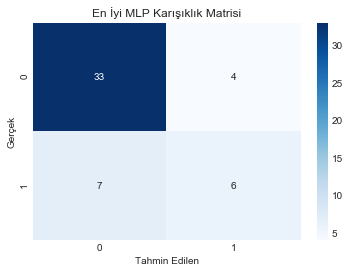

In [37]:

# Hiperparametre aralığını tanımlama
mlp_params = {
    "alpha": [0.1, 0.01, 0.001],
    "hidden_layer_sizes": [(8,8,8), (64,64,64), (128,128,128), (8,6), (4,6)],
    "solver": ["lbfgs", "adam", "sgd"],
    "activation": ["relu", "logistic"]
}

# GridSearchCV kullanarak en iyi hiperparametreleri belirleme
mlp = MLPClassifier()
mlp_cv = GridSearchCV(mlp, mlp_params, cv=10, n_jobs=-1, verbose=2).fit(X_train_z, y_train)

# En iyi hiperparametreleri görüntüleme
best_params = mlp_cv.best_params_
print(f"En İyi Hiperparametreler: {best_params}")

# En iyi hiperparametrelerle MLPClassifier modelini kurma ve eğitme
mlp_best = MLPClassifier(
    activation=best_params['activation'],
    alpha=best_params['alpha'],
    solver=best_params['solver'],
    hidden_layer_sizes=best_params['hidden_layer_sizes'],
    random_state=42
).fit(X_train_z, y_train)

# Test seti üzerinde tahmin yapma
preds_mlp_best = mlp_best.predict(X_test_z)

# Doğruluk skorunu hesaplama
accuracy_mlp_best = accuracy_score(y_test, preds_mlp_best)
print(f"En İyi MLP Doğruluk Skoru: {accuracy_mlp_best:.2f}")

# Çapraz doğrulama skorunu hesaplama
cross_val_scores_mlp_best = cross_val_score(mlp_best, X_test_z, y_test, cv=10)
mean_cross_val_score_mlp_best = cross_val_scores_mlp_best.mean()
print(f"Çapraz Doğrulama Ortalama Skoru (En İyi MLP): {mean_cross_val_score_mlp_best:.2f}")

# Sınıflandırma raporu
class_report_mlp_best = classification_report(y_test, preds_mlp_best)
print("En İyi MLP Sınıflandırma Raporu:\n", class_report_mlp_best)

# Karışıklık Matrisi
conf_matrix_mlp_best = confusion_matrix(y_test, preds_mlp_best)
sns.heatmap(conf_matrix_mlp_best, annot=True, fmt='d', cmap='Blues')
plt.title("En İyi MLP Karışıklık Matrisi")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

---
### 🌳 Cart
---

CART Doğruluk Skoru: 0.68
Çapraz Doğrulama Ortalama Skoru (CART): 0.82
CART Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79        37
           1       0.36      0.31      0.33        13

   micro avg       0.68      0.68      0.68        50
   macro avg       0.57      0.56      0.56        50
weighted avg       0.66      0.68      0.67        50



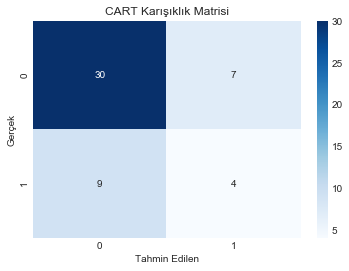

In [39]:
# DecisionTreeClassifier modelini kurma ve eğitme
cart_model = DecisionTreeClassifier(random_state=42).fit(x_train, y_train)

# Test seti üzerinde tahmin yapma
preds_cart = cart_model.predict(x_test)

# Doğruluk skorunu hesaplama
accuracy_cart = accuracy_score(y_test, preds_cart)
print(f"CART Doğruluk Skoru: {accuracy_cart:.2f}")

# Çapraz doğrulama skorunu hesaplama
cross_val_scores_cart = cross_val_score(cart_model, x_test, y_test, cv=10)
mean_cross_val_score_cart = cross_val_scores_cart.mean()
print(f"Çapraz Doğrulama Ortalama Skoru (CART): {mean_cross_val_score_cart:.2f}")

# Sınıflandırma raporu
class_report_cart = classification_report(y_test, preds_cart)
print("CART Sınıflandırma Raporu:\n", class_report_cart)

# Karışıklık Matrisi
conf_matrix_cart = confusion_matrix(y_test, preds_cart)
sns.heatmap(conf_matrix_cart, annot=True, fmt='d', cmap='Blues')
plt.title("CART Karışıklık Matrisi")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

Fitting 10 folds for each of 522 candidates, totalling 5220 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 3672 tasks      | elapsed:    2.1s


En İyi Hiperparametreler: {'max_depth': 3, 'min_samples_split': 2}
En İyi CART Doğruluk Skoru: 0.76
Çapraz Doğrulama Ortalama Skoru (En İyi CART): 0.71
En İyi CART Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.80      0.89      0.85        37
           1       0.56      0.38      0.45        13

   micro avg       0.76      0.76      0.76        50
   macro avg       0.68      0.64      0.65        50
weighted avg       0.74      0.76      0.74        50



[Parallel(n_jobs=-1)]: Done 5220 out of 5220 | elapsed:    2.8s finished


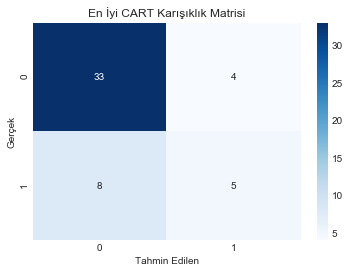

In [43]:
# Hiperparametre aralığını tanımlama
cart_params = {"max_depth": list(range(1, 10)), "min_samples_split": list(range(2, 60))}

# GridSearchCV kullanarak en iyi hiperparametreleri belirleme
cart = DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_params, cv=10, n_jobs=-1, verbose=2).fit(x_train, y_train)

# En iyi hiperparametreleri görüntüleme
best_params = cart_cv.best_params_
print(f"En İyi Hiperparametreler: {best_params}")

# En iyi hiperparametrelerle DecisionTreeClassifier modelini kurma ve eğitme
cart_best = DecisionTreeClassifier(max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split']).fit(x_train, y_train)

# Test seti üzerinde tahmin yapma
cart_preds_best = cart_best.predict(x_test)

# Doğruluk skorunu hesaplama
accuracy_cart_best = accuracy_score(y_test, cart_preds_best)
print(f"En İyi CART Doğruluk Skoru: {accuracy_cart_best:.2f}")

# Çapraz doğrulama skorunu hesaplama
cross_val_scores_cart_best = cross_val_score(cart_best, x_test, y_test, cv=10)
mean_cross_val_score_cart_best = cross_val_scores_cart_best.mean()
print(f"Çapraz Doğrulama Ortalama Skoru (En İyi CART): {mean_cross_val_score_cart_best:.2f}")

# Sınıflandırma raporu
class_report_cart_best = classification_report(y_test, cart_preds_best)
print("En İyi CART Sınıflandırma Raporu:\n", class_report_cart_best)

# Karışıklık Matrisi
conf_matrix_cart_best = confusion_matrix(y_test, cart_preds_best)
sns.heatmap(conf_matrix_cart_best, annot=True, fmt='d', cmap='Blues')
plt.title("En İyi CART Karışıklık Matrisi")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

---
### 🍃 Random Forest
---

Random Forest Doğruluk Skoru: 0.72
Çapraz Doğrulama Ortalama Skoru (Random Forest): 0.79
Random Forest Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82        37
           1       0.44      0.31      0.36        13

   micro avg       0.72      0.72      0.72        50
   macro avg       0.61      0.59      0.59        50
weighted avg       0.69      0.72      0.70        50



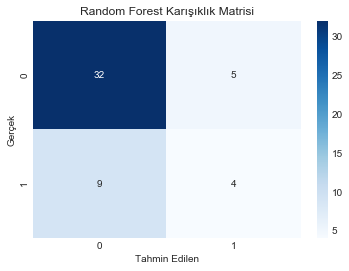

In [44]:
# RandomForestClassifier modelini kurma ve eğitme
rf_model = RandomForestClassifier(random_state=42).fit(x_train, y_train)

# Test seti üzerinde tahmin yapma
preds_rf = rf_model.predict(x_test)

# Doğruluk skorunu hesaplama
accuracy_rf = accuracy_score(y_test, preds_rf)
print(f"Random Forest Doğruluk Skoru: {accuracy_rf:.2f}")

# Çapraz doğrulama skorunu hesaplama
cross_val_scores_rf = cross_val_score(rf_model, x_test, y_test, cv=10)
mean_cross_val_score_rf = cross_val_scores_rf.mean()
print(f"Çapraz Doğrulama Ortalama Skoru (Random Forest): {mean_cross_val_score_rf:.2f}")

# Sınıflandırma raporu
class_report_rf = classification_report(y_test, preds_rf)
print("Random Forest Sınıflandırma Raporu:\n", class_report_rf)

# Karışıklık Matrisi
conf_matrix_rf = confusion_matrix(y_test, preds_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Karışıklık Matrisi")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


En İyi Hiperparametreler: {'max_depth': 5, 'min_samples_split': 8, 'n_estimators': 10}
En İyi Random Forest Doğruluk Skoru: 0.76
Çapraz Doğrulama Ortalama Skoru (En İyi Random Forest): 0.74
En İyi Random Forest Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85        37
           1       0.57      0.31      0.40        13

   micro avg       0.76      0.76      0.76        50
   macro avg       0.68      0.61      0.62        50
weighted avg       0.73      0.76      0.73        50



[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   30.2s finished


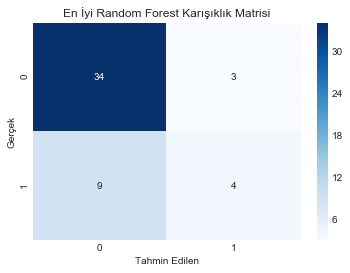

In [45]:
# Hiperparametre aralığını tanımlama
rf_params = {
    "max_depth": [2, 5, 8, 10],
    "n_estimators": [10, 100, 500, 1000],
    "min_samples_split": [2, 8, 10]
}

# GridSearchCV kullanarak en iyi hiperparametreleri belirleme
rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, rf_params, cv=10, n_jobs=-1, verbose=2).fit(x_train, y_train)

# En iyi hiperparametreleri görüntüleme
best_params = rf_cv.best_params_
print(f"En İyi Hiperparametreler: {best_params}")

# En iyi hiperparametrelerle RandomForestClassifier modelini kurma ve eğitme
rf_best = RandomForestClassifier(
    max_depth=best_params['max_depth'],
    n_estimators=best_params['n_estimators'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
).fit(x_train, y_train)

# Test seti üzerinde tahmin yapma
preds_rf_best = rf_best.predict(x_test)

# Doğruluk skorunu hesaplama
accuracy_rf_best = accuracy_score(y_test, preds_rf_best)
print(f"En İyi Random Forest Doğruluk Skoru: {accuracy_rf_best:.2f}")

# Çapraz doğrulama skorunu hesaplama
cross_val_scores_rf_best = cross_val_score(rf_best, x_test, y_test, cv=10)
mean_cross_val_score_rf_best = cross_val_scores_rf_best.mean()
print(f"Çapraz Doğrulama Ortalama Skoru (En İyi Random Forest): {mean_cross_val_score_rf_best:.2f}")

# Sınıflandırma raporu
class_report_rf_best = classification_report(y_test, preds_rf_best)
print("En İyi Random Forest Sınıflandırma Raporu:\n", class_report_rf_best)

# Karışıklık Matrisi
conf_matrix_rf_best = confusion_matrix(y_test, preds_rf_best)
sns.heatmap(conf_matrix_rf_best, annot=True, fmt='d', cmap='Blues')
plt.title("En İyi Random Forest Karışıklık Matrisi")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

---
### 🌟Gradient Boosting
---

Gradient Boosting Doğruluk Skoru: 0.70
Çapraz Doğrulama Ortalama Skoru (Gradient Boosting): 0.82
Gradient Boosting Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.74      0.92      0.82        37
           1       0.25      0.08      0.12        13

   micro avg       0.70      0.70      0.70        50
   macro avg       0.49      0.50      0.47        50
weighted avg       0.61      0.70      0.64        50



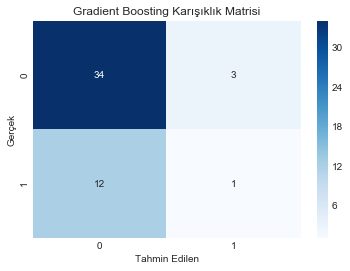

In [46]:
# GradientBoostingClassifier modelini kurma ve eğitme
gb_model = GradientBoostingClassifier(random_state=42).fit(x_train, y_train)

# Test seti üzerinde tahmin yapma
preds_gb = gb_model.predict(x_test)

# Doğruluk skorunu hesaplama
accuracy_gb = accuracy_score(y_test, preds_gb)
print(f"Gradient Boosting Doğruluk Skoru: {accuracy_gb:.2f}")

# Çapraz doğrulama skorunu hesaplama
cross_val_scores_gb = cross_val_score(gb_model, x_test, y_test, cv=10)
mean_cross_val_score_gb = cross_val_scores_gb.mean()
print(f"Çapraz Doğrulama Ortalama Skoru (Gradient Boosting): {mean_cross_val_score_gb:.2f}")

# Sınıflandırma raporu
class_report_gb = classification_report(y_test, preds_gb)
print("Gradient Boosting Sınıflandırma Raporu:\n", class_report_gb)

# Karışıklık Matrisi
conf_matrix_gb = confusion_matrix(y_test, preds_gb)
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues')
plt.title("Gradient Boosting Karışıklık Matrisi")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 335 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 538 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 821 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1186 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  3.0min finished


En İyi Hiperparametreler: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 500}
En İyi Gradient Boosting Doğruluk Skoru: 0.76
Çapraz Doğrulama Ortalama Skoru (En İyi Gradient Boosting): 0.81
En İyi Gradient Boosting Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85        37
           1       0.57      0.31      0.40        13

   micro avg       0.76      0.76      0.76        50
   macro avg       0.68      0.61      0.62        50
weighted avg       0.73      0.76      0.73        50



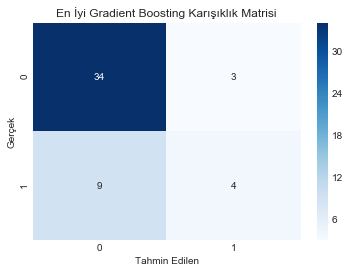

In [48]:
# Hiperparametre aralığını tanımlama
gb_params = {
    "learning_rate": [0.001, 0.01, 0.05, 0.1],
    "n_estimators": [50, 100, 500, 1000],
    "max_depth": [3, 8, 10],
    "min_samples_split": [2, 8, 10]
}

# GridSearchCV kullanarak en iyi hiperparametreleri belirleme
gb = GradientBoostingClassifier()
gb_cv = GridSearchCV(gb, gb_params, cv=10, n_jobs=-1, verbose=2).fit(x_train, y_train)

# En iyi hiperparametreleri görüntüleme
best_params = gb_cv.best_params_
print(f"En İyi Hiperparametreler: {best_params}")

# En iyi hiperparametrelerle GradientBoostingClassifier modelini kurma ve eğitme
gb_best = GradientBoostingClassifier(
    learning_rate=best_params['learning_rate'],
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
).fit(x_train, y_train)

# Test seti üzerinde tahmin yapma
preds_gb_best = gb_best.predict(x_test)

# Doğruluk skorunu hesaplama
accuracy_gb_best = accuracy_score(y_test, preds_gb_best)
print(f"En İyi Gradient Boosting Doğruluk Skoru: {accuracy_gb_best:.2f}")

# Çapraz doğrulama skorunu hesaplama
cross_val_scores_gb_best = cross_val_score(gb_best, x_test, y_test, cv=10)
mean_cross_val_score_gb_best = cross_val_scores_gb_best.mean()
print(f"Çapraz Doğrulama Ortalama Skoru (En İyi Gradient Boosting): {mean_cross_val_score_gb_best:.2f}")

# Sınıflandırma raporu
class_report_gb_best = classification_report(y_test, preds_gb_best)
print("En İyi Gradient Boosting Sınıflandırma Raporu:\n", class_report_gb_best)

# Karışıklık Matrisi
conf_matrix_gb_best = confusion_matrix(y_test, preds_gb_best)
sns.heatmap(conf_matrix_gb_best, annot=True, fmt='d', cmap='Blues')
plt.title("En İyi Gradient Boosting Karışıklık Matrisi")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

---
### ❌ XGBOOST
---

XGBRFClassifier Doğruluk Skoru: 0.76
Çapraz Doğrulama Ortalama Skoru (XGBRFClassifier): 0.77
XGBRFClassifier Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85        37
           1       0.57      0.31      0.40        13

   micro avg       0.76      0.76      0.76        50
   macro avg       0.68      0.61      0.62        50
weighted avg       0.73      0.76      0.73        50



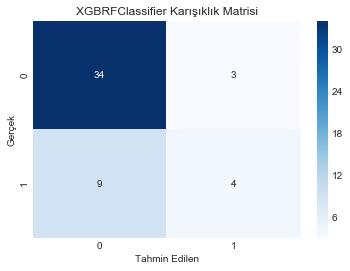

In [49]:
# XGBRFClassifier modelini kurma ve eğitme
xgb_model = XGBRFClassifier(random_state=42).fit(x_train, y_train)

# Test seti üzerinde tahmin yapma
preds_xgb = xgb_model.predict(x_test)

# Doğruluk skorunu hesaplama
accuracy_xgb = accuracy_score(y_test, preds_xgb)
print(f"XGBRFClassifier Doğruluk Skoru: {accuracy_xgb:.2f}")

# Çapraz doğrulama skorunu hesaplama
cross_val_scores_xgb = cross_val_score(xgb_model, x_test, y_test, cv=10)
mean_cross_val_score_xgb = cross_val_scores_xgb.mean()
print(f"Çapraz Doğrulama Ortalama Skoru (XGBRFClassifier): {mean_cross_val_score_xgb:.2f}")

# Sınıflandırma raporu
class_report_xgb = classification_report(y_test, preds_xgb)
print("XGBRFClassifier Sınıflandırma Raporu:\n", class_report_xgb)

# Karışıklık Matrisi
conf_matrix_xgb = confusion_matrix(y_test, preds_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title("XGBRFClassifier Karışıklık Matrisi")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 598 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 1004 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 1389 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done 2031 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done 2667 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3568 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 4373 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 5610 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 7000 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed:  2.9min finished


[14:42:11] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


En İyi Hiperparametreler: {'learning_rate': 0.001, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 10, 'subsample': 0.6}
En İyi XGBRFClassifier Doğruluk Skoru: 0.76
Çapraz Doğrulama Ortalama Skoru (En İyi XGBRFClassifier): 0.77
En İyi XGBRFClassifier Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.80      0.89      0.85        37
           1       0.56      0.38      0.45        13

   micro avg       0.76      0.76      0.76        50
   macro avg       0.68      0.64      0.65        50
weighted avg       0

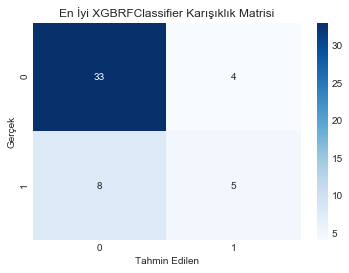

In [51]:
# Hiperparametre aralığını tanımlama
xgb_params = {
    "n_estimators": [10, 100, 500, 1000],
    "subsample": [0.6, 0.75, 0.95],
    "max_depth": [3, 5, 8],
    "learning_rate": [0.001, 0.01, 0.05, 0.025, 0.1],
    "min_samples_split": [2, 5, 8, 10]
}

# GridSearchCV kullanarak en iyi hiperparametreleri belirleme
xgb = XGBRFClassifier()
xgb_cv = GridSearchCV(xgb, xgb_params, cv=10, n_jobs=-1, verbose=2).fit(x_train, y_train)

# En iyi hiperparametreleri görüntüleme
best_params = xgb_cv.best_params_
print(f"En İyi Hiperparametreler: {best_params}")

# En iyi hiperparametrelerle XGBRFClassifier modelini kurma ve eğitme
xgb_best = XGBRFClassifier(
    n_estimators=best_params['n_estimators'],
    subsample=best_params['subsample'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    random_state=42
).fit(x_train, y_train)

# Test seti üzerinde tahmin yapma
preds_xgb_best = xgb_best.predict(x_test)

# Doğruluk skorunu hesaplama
accuracy_xgb_best = accuracy_score(y_test, preds_xgb_best)
print(f"En İyi XGBRFClassifier Doğruluk Skoru: {accuracy_xgb_best:.2f}")

# Çapraz doğrulama skorunu hesaplama
cross_val_scores_xgb_best = cross_val_score(xgb_best, x_test, y_test, cv=10)
mean_cross_val_score_xgb_best = cross_val_scores_xgb_best.mean()
print(f"Çapraz Doğrulama Ortalama Skoru (En İyi XGBRFClassifier): {mean_cross_val_score_xgb_best:.2f}")

# Sınıflandırma raporu
class_report_xgb_best = classification_report(y_test, preds_xgb_best)
print("En İyi XGBRFClassifier Sınıflandırma Raporu:\n", class_report_xgb_best)

# Karışıklık Matrisi
conf_matrix_xgb_best = confusion_matrix(y_test, preds_xgb_best)
sns.heatmap(conf_matrix_xgb_best, annot=True, fmt='d', cmap='Blues')
plt.title("En İyi XGBRFClassifier Karışıklık Matrisi")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

---
### 🤔Karar Aşaması
---

                     Accuracy
Logistic Regression     0.780
Naive Bayes             0.780
SVC                     0.780
XGBoost                 0.760
MLP                     0.740
KNN                     0.720
Random Forest           0.720
Gradient Boosting       0.700
Decision Tree           0.680


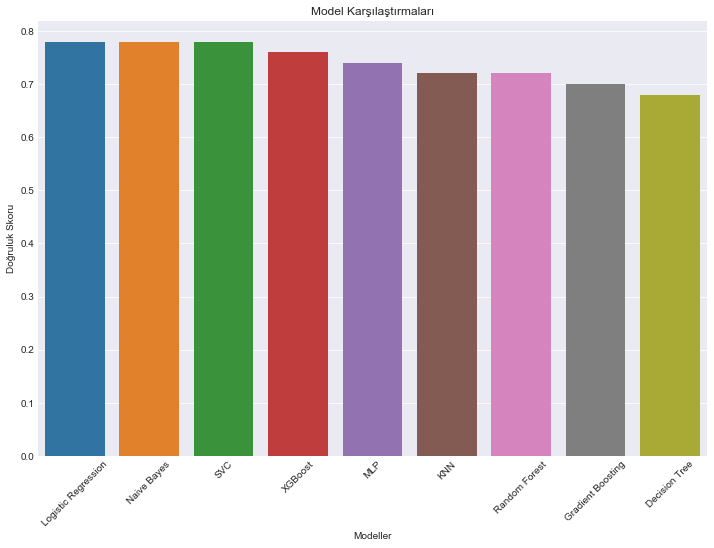

En İyi Model: Logistic Regression
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87        37
           1       1.00      0.15      0.27        13

   micro avg       0.78      0.78      0.78        50
   macro avg       0.89      0.58      0.57        50
weighted avg       0.83      0.78      0.71        50



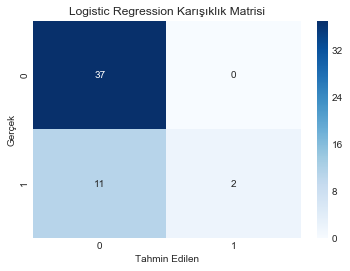

In [54]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(kernel='linear'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBRFClassifier(random_state=42),
    "MLP": MLPClassifier(random_state=42)
}

results = {}

for model_name, model in models.items():
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    accuracy = accuracy_score(y_test, preds)
    results[model_name] = accuracy

# Sonuçları DataFrame'e dönüştürme
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print(results_df)

# Doğruluk skorlarını görselleştirme
plt.figure(figsize=(12, 8))
sns.barplot(x=results_df.index, y='Accuracy', data=results_df)
plt.title('Model Karşılaştırmaları')
plt.xlabel('Modeller')
plt.ylabel('Doğruluk Skoru')
plt.xticks(rotation=45)
plt.show()

# En iyi modeli seçme
best_model_name = results_df.idxmax().values[0]
best_model = models[best_model_name]

# En iyi modelin performansını detaylı inceleme
best_preds = best_model.predict(x_test)

# Sınıflandırma raporu
print(f"En İyi Model: {best_model_name}")
print("Sınıflandırma Raporu:\n", classification_report(y_test, best_preds))

# Karışıklık Matrisi
conf_matrix_best = confusion_matrix(y_test, best_preds)
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues')
plt.title(f"{best_model_name} Karışıklık Matrisi")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()